In [40]:
#imprting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [41]:
#fetching data from my drive
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\DSData-master\DSData-master\Advertising.csv")
data.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [42]:
data.shape

(200, 5)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [44]:
#checking data null value and mean std etc
data.describe()

Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [45]:
#droping columns
data=data.drop(data.columns[[0]], axis = 1)

In [46]:
data

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [10]:
# checking for null values
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [79]:
#splittind data
x=data[['TV','radio','newspaper']]
y=data.sales



In [ ]:
#lr model implementation
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_[0])
print(lm.coef_[1])
print(lm.coef_[2])


In [80]:
#checking skewness
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [14]:
#power transform for skewness removing
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [15]:
df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
sales       -0.007841
dtype: float64

In [16]:
#correlation matrix 
corr_mat=data.corr()

In [17]:
corr_mat

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [18]:
corr_matrix=data.corr()
corr_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<AxesSubplot:>

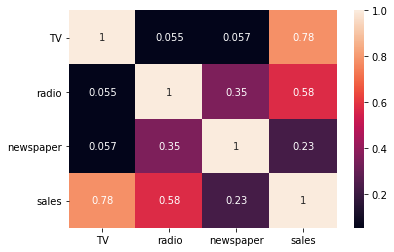

In [78]:
#heat map for corelation identifying
sns.heatmap(data.corr(), annot=True)

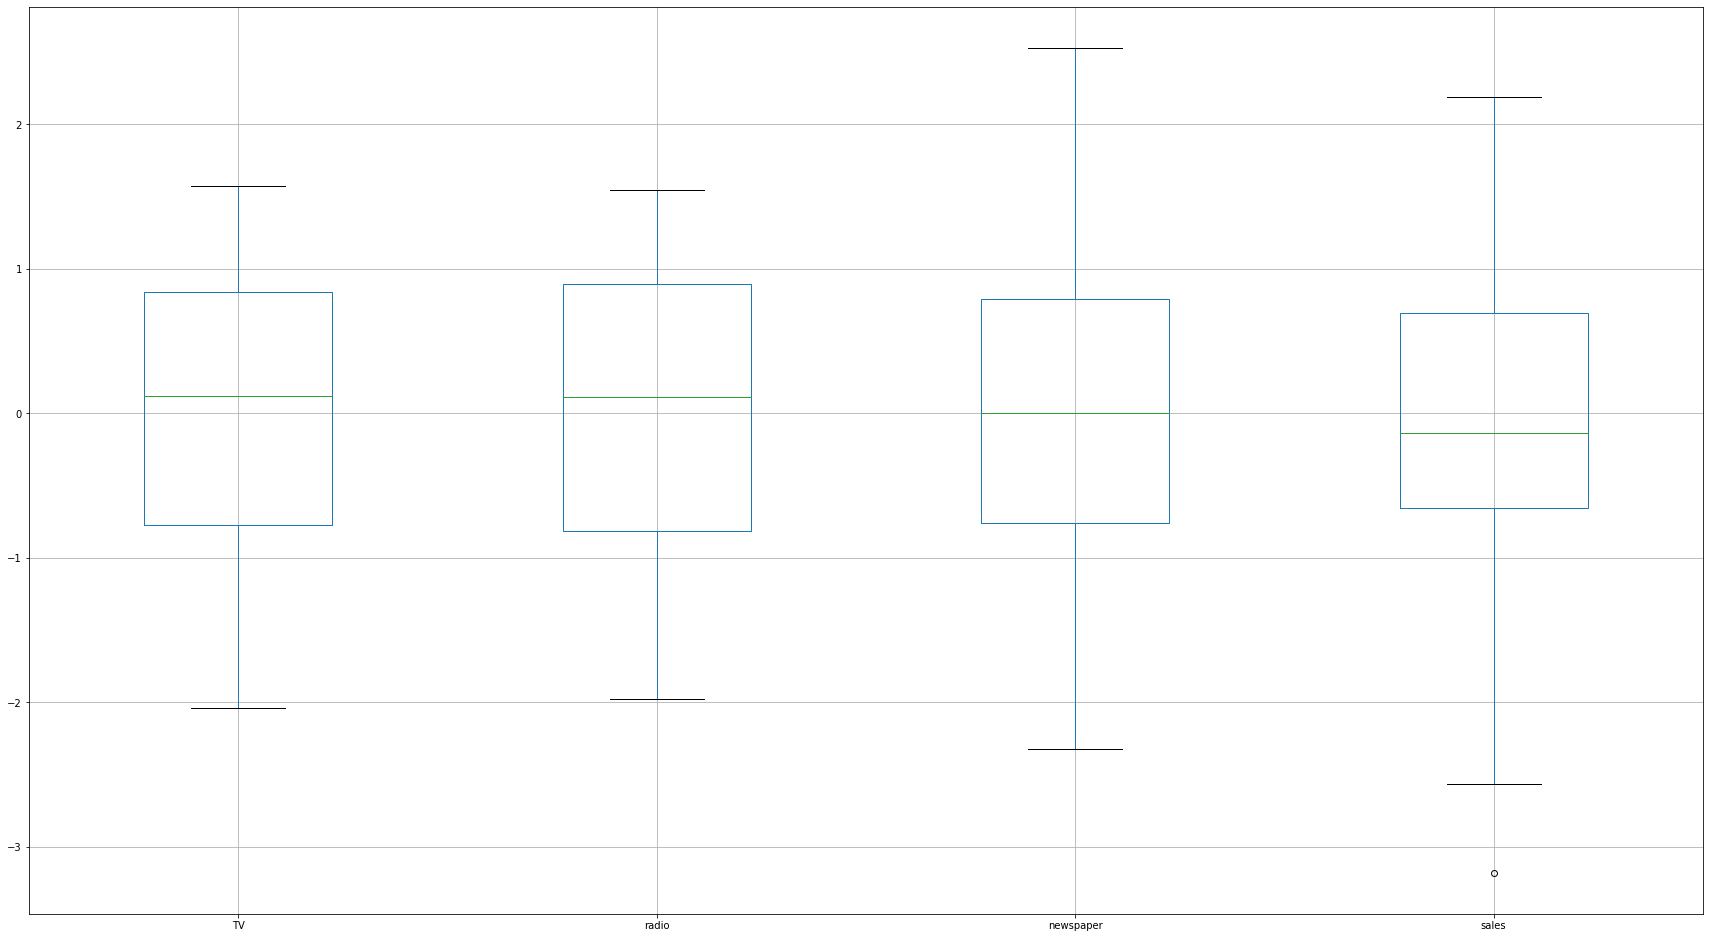

In [81]:
#box plot for outliets
df_new.boxplot(figsize=[30,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

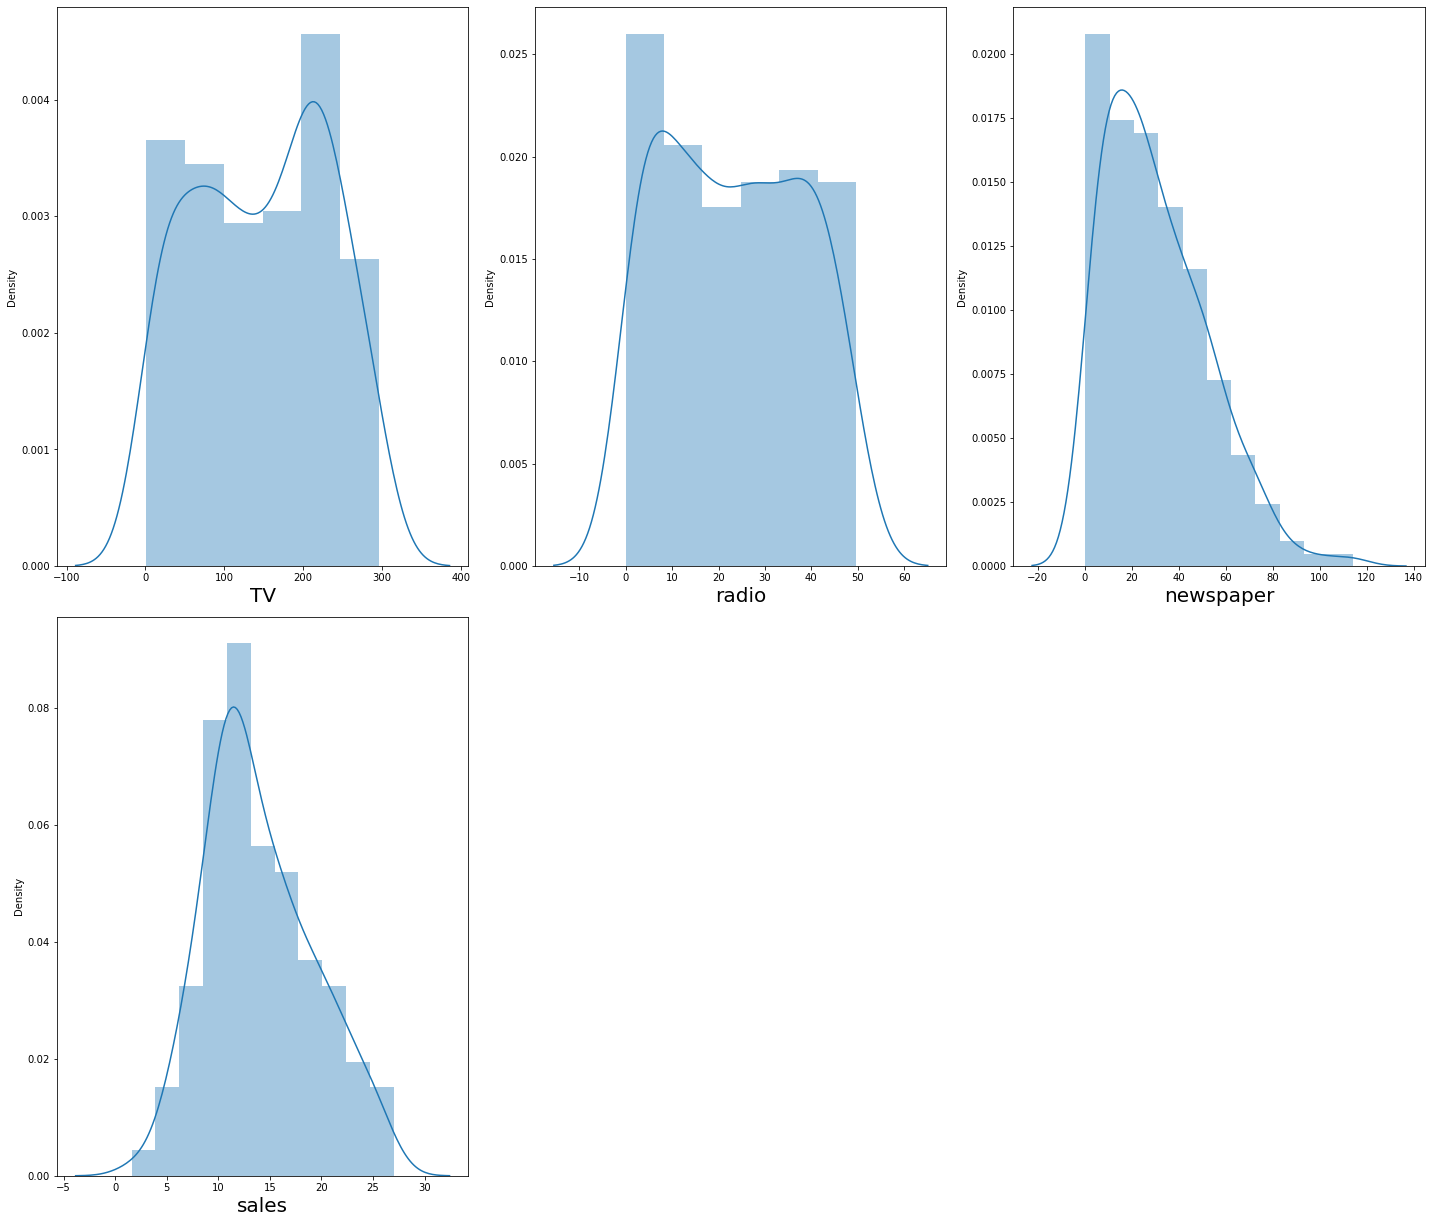

In [20]:
#dist plot for skewed data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=4:
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [21]:
#removing data
q=data['newspaper'].quantile(0.90)
data_cleaned = data[data['newspaper']<q]

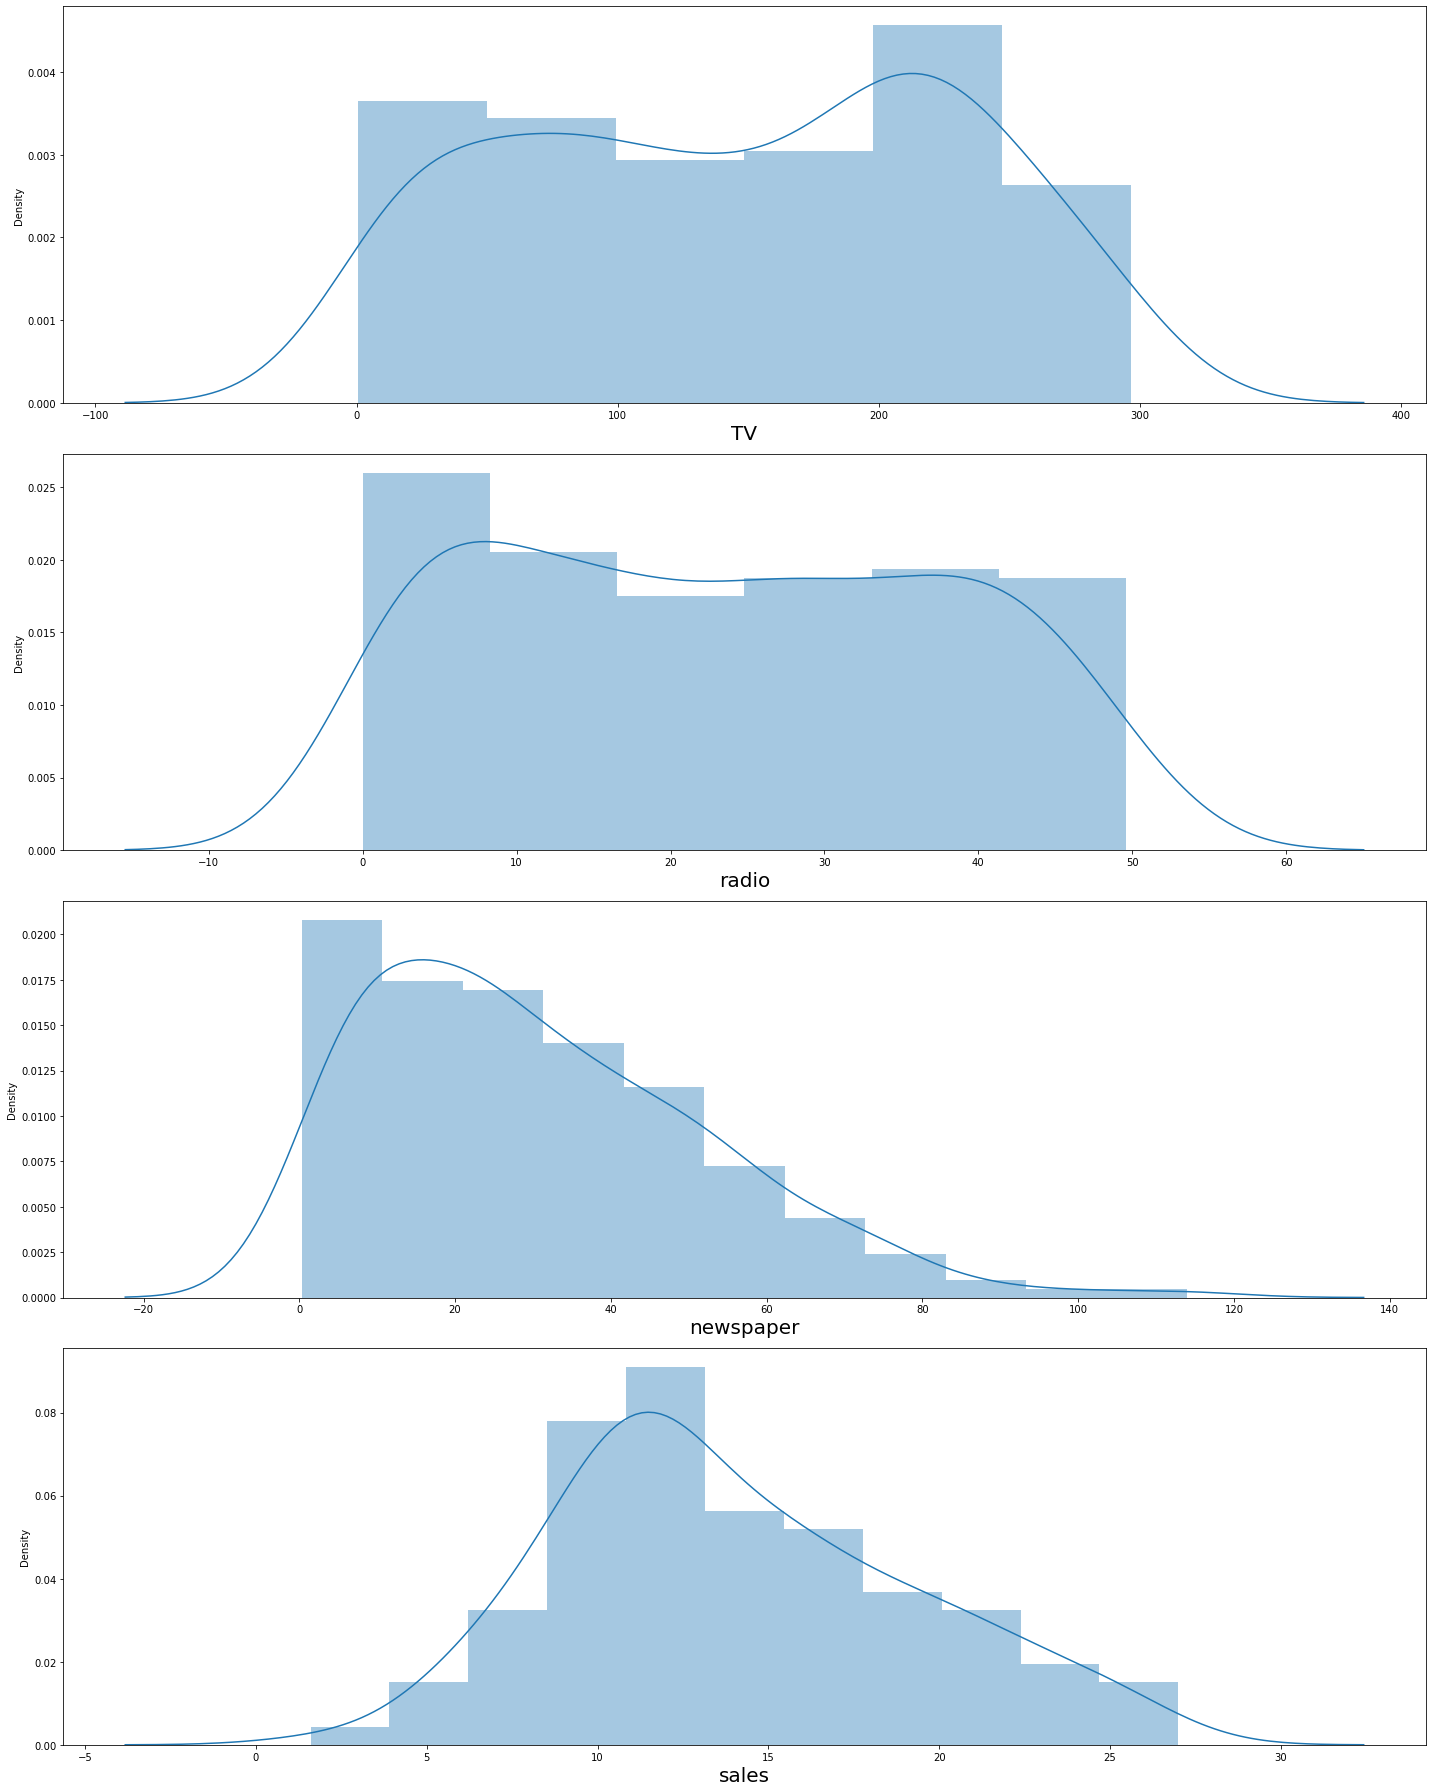

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=4:
        ax =plt.subplot(4,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
#splitting data
y=data['sales']

x=data.drop(columns=['sales'])

In [24]:
x

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [123]:
#trainning data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [124]:
#lr model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)


LinearRegression()

In [125]:
lm.score(x_train,y_train)

0.9060138837724642

In [126]:
lm.score(x_test,y_test)

0.8565705451858294

In [127]:
y_pred = lm.predict(x_test)

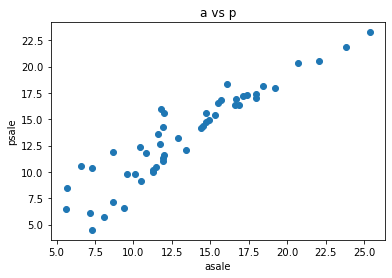

In [128]:
#scatter plot for actual v/s predicted
plt.scatter(y_test,y_pred)
plt.xlabel('asale')
plt.ylabel('psale')
plt.title('a vs p')
plt.show()

In [91]:
#importing library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [130]:
y=data['sales']

x=data.drop(columns=['sales'])



In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)



In [132]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)



In [135]:
print("MSE :", np.sqrt(mean_squared_error(y_test, lm_preds)))
print("R^2: ", r2_score(y_test, lm_preds))

MSE : 3.748697497467727
R^2:  0.399025313368911


In [ ]:
#checking for sales with two features to predicit best sales 

In [96]:
X = data[['TV', 'radio']]
y = data.sales



In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)



In [98]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)



In [136]:

print("MSE :", np.sqrt(mean_squared_error(y_test, lm_preds)))
print("R^2: ", r2_score(y_test, lm_preds))

MSE : 3.748697497467727
R^2:  0.399025313368911


In [137]:
X = data[['TV', 'newspaper']]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)

print("MSE :", np.sqrt(mean_squared_error(y_test, lm_preds)))
print("R^2: ", r2_score(y_test, lm_preds))


MSE : 3.352056334433862
R^2:  0.5194727680455272


In [138]:
X = data[['newspaper', 'radio']]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)

print("MSE :", np.sqrt(mean_squared_error(y_test, lm_preds)))
print("R^2: ", r2_score(y_test, lm_preds))


MSE : 3.748697497467727
R^2:  0.399025313368911


In [139]:
#implementing ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()



In [140]:
parameters = {"alpha":[15, 10, 8, 4, 13, 2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(x, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [15, 10, 8, 4, 13, 2, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [141]:
print(ridge_regression.best_params_)


{'alpha': 20}


In [142]:
print(ridge_regression.best_score_)

-3.072671338341143


In [143]:
#implementing lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()



In [144]:
parameters = {"alpha":[15, 10, 8, 4, 13, 2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [15, 10, 8, 4, 13, 2, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [145]:
print(lasso_regression.best_params_)


{'alpha': 2}


In [146]:
print(lasso_regression.best_score_)

-3.030024697576212


In [147]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lm,x,y,cv=5)
print(scr.mean())

0.8871063495438436


In [148]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lasso,x,y,cv=5)
print(scr.mean())

0.8882007416256036


In [149]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(ridge,x,y,cv=5)
print(scr.mean())

0.8871067777046353


In [150]:
import pickle

from sklearn import model_selection
filename = 'sales.sav'
pickle.dump(data, open(filename, 'wb'))